In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model, Input
from tensorflow.keras.optimizers import SGD, Adam



###-----------------
# load training data
###-----------------
##path_to_task = "nndl/Lab3"

#avg_monthly_precip = np.loadtxt(fname = "/home/jpalomino/earth-analytics-bootcamp/data/avg-monthly-precip.txt")

input = np.loadtxt('exercise3b_input.txt')
tmp = np.loadtxt('exercise3b_target.txt')
target = np.array([tmp[i] for i in range(tmp.size)])
class1 = np.loadtxt('exercise3b_class1.txt')
class2 = np.loadtxt('exercise3b_class2.txt')


C:\Users\abirc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\abirc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\abirc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\abirc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [34]:
# Define the structure
input_layer = Input(shape=(2,), name='input') # two dimensional input
out = Dense(units=1, activation="sigmoid", name="output")(input_layer) # one ouput node with sigmoid activation

# create a model
model = Model(input_layer, out)

# show how the model looks
model.summary()

# compile the model
opt = SGD(learning_rate=0.1)
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["acc"])

# try to invoke one of the weight initializers
# initializer = tf.keras.initializers.GlorotUniform()
# shape = (2,1) # n_in, n_out
# random_weights = tf.Variable(initializer(shape=shape)) # returns tensor object; how to convert to numpy array needed for set_weights?
# random_weights = np.random.uniform(low = -1.0, high = 1.0, size=(2,1))

# weights: list; index 0: weights (numpy array of shape n_in x n_out), index 1: biases (numpy array)
# model.set_weights([ random_weights, np.array([0])])

# save initial weights
initial_weights = model.layers[-1].get_weights() 

print("initial weights: (%f, %f)" % (initial_weights[0][0], initial_weights[0][1]))
print("initial bias: %f" % initial_weights[1][0])


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
output (Dense)               (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
initial weights: (0.816270, 0.176497)
initial bias: 0.000000


In [37]:
from sklearn.neural_network import MLPClassifier

# Train the model
history = model.fit(x=input, y=target, batch_size=1, epochs=100, verbose=True)

"""fit(
    x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None,
    validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,
    sample_weight=None, initial_epoch=0, steps_per_epoch=None,
    validation_steps=None, validation_batch_size=None, validation_freq=1,
    max_queue_size=10, workers=1, use_multiprocessing=False
) """

#use of MLPClassifier
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)
# clf.fit(X, y)

#1st Setting (Default): 

numEpochs = 100
#net = MLPCIassifler(activation='logistic', hidden_layer_sizes=(), batch_size=1, learning_rate='iconstant', learning_rate_init=0.1, shuffle=False, max_iter=1, warm_start=True, momentum = 0.0, nesterovs_momentum=False, solver='sgd', verbose=True, validation_fraction=0.0, alpha=0.0, to1=0.00001)


Epoch 1/100
200/200 [==============================] - 0s 681us/sample - loss: 0.2188 - acc: 0.9450
Epoch 2/100
200/200 [==============================] - 0s 662us/sample - loss: 0.2176 - acc: 0.9400s - loss: 0.1836 - acc: 0.95
Epoch 3/100
200/200 [==============================] - 0s 695us/sample - loss: 0.2177 - acc: 0.9450
Epoch 4/100
200/200 [==============================] - 0s 680us/sample - loss: 0.2162 - acc: 0.9400
Epoch 5/100
200/200 [==============================] - 0s 675us/sample - loss: 0.2155 - acc: 0.9350
Epoch 6/100
200/200 [==============================] - 0s 643us/sample - loss: 0.2159 - acc: 0.9400
Epoch 7/100
200/200 [==============================] - 0s 680us/sample - loss: 0.2148 - acc: 0.9400
Epoch 8/100
200/200 [==============================] - 0s 695us/sample - loss: 0.2143 - acc: 0.9450
Epoch 9/100
200/200 [==============================] - 0s 679us/sample - loss: 0.2133 - acc: 0.9500
Epoch 10/100
200/200 [==============================] - 0s 757us/sample 

Epoch 80/100
200/200 [==============================] - 0s 582us/sample - loss: 0.1838 - acc: 0.9400
Epoch 81/100
200/200 [==============================] - 0s 679us/sample - loss: 0.1837 - acc: 0.9400
Epoch 82/100
200/200 [==============================] - 0s 723us/sample - loss: 0.1831 - acc: 0.9450
Epoch 83/100
200/200 [==============================] - 0s 718us/sample - loss: 0.1800 - acc: 0.9350
Epoch 84/100
200/200 [==============================] - 0s 612us/sample - loss: 0.1840 - acc: 0.9300
Epoch 85/100
200/200 [==============================] - 0s 615us/sample - loss: 0.1823 - acc: 0.9350
Epoch 86/100
200/200 [==============================] - 0s 630us/sample - loss: 0.1798 - acc: 0.9550
Epoch 87/100
200/200 [==============================] - 0s 757us/sample - loss: 0.1831 - acc: 0.9350
Epoch 88/100
200/200 [==============================] - 0s 623us/sample - loss: 0.1825 - acc: 0.9450
Epoch 89/100
200/200 [==============================] - 0s 607us/sample - loss: 0.1813 - ac

final weights: (-33.505432, 9.672741)
final bias: 6.864587


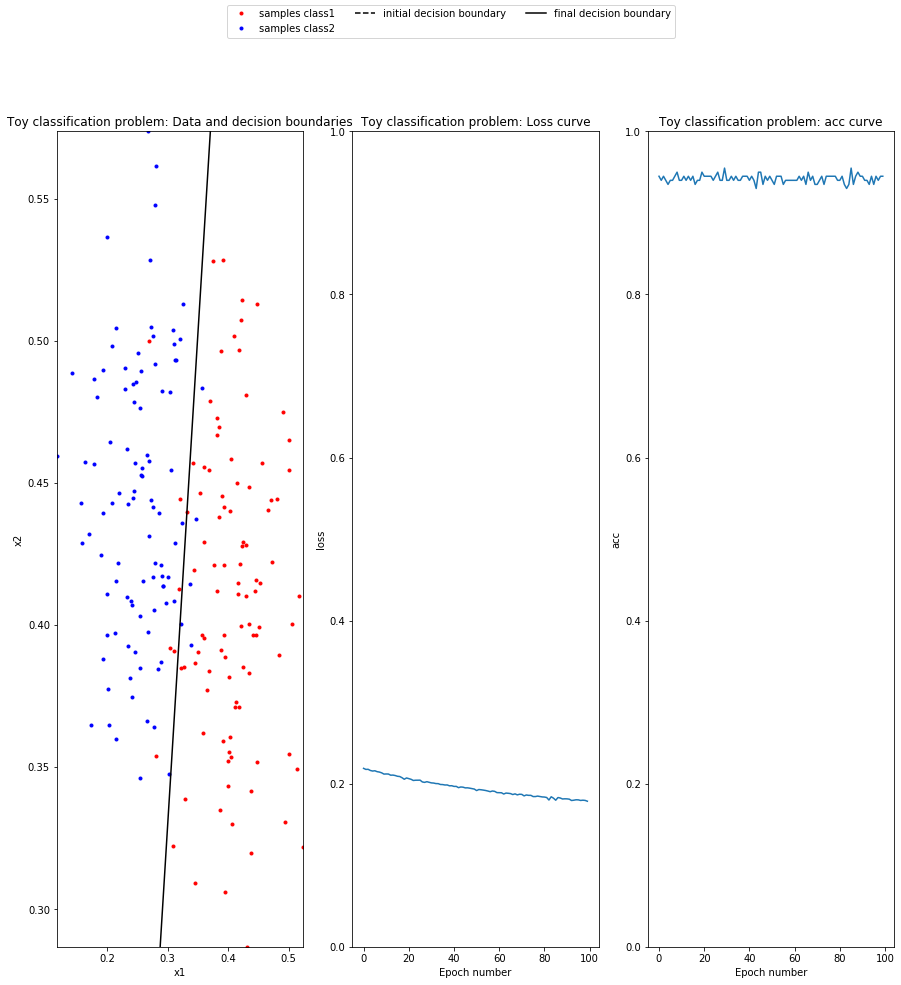

200/200 [==============================] - 0s 93us/sample - loss: 0.1767 - acc: 0.9450
Final loss: 0.176661, final accuray: 0.945000

number of binary errors: 11, error rate: 0.055000, accuracy: 0.945000


In [38]:
# plot setup
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
legend = []

# plot the data
axes[0].set_title('Toy classification problem: Data and decision boundaries')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')

minx = min(input[:,0])
maxx = max(input[:,0])
miny = min(input[:,1])
maxy = max(input[:,1])
axes[0].set_xlim(minx, maxx)
axes[0].set_ylim(miny, maxy) 
axes[0].plot(class1[:,0], class1[:,1], 'r.', \
    class2[:,0], class2[:,1], 'b.')
legend.append('samples class1')
legend.append('samples class2')

# initial weights 
w0 = initial_weights[1][0] # bias
# weight components (list of of numpy arrays of shape n_in x n_out)
w1 = initial_weights[0][0][0]
w2 = initial_weights[0][1][0]
if ( w2 == 0 ):
    print("Error: second weight zero!")

# calculate initial decision boundary
interval = np.arange( np.floor(minx), np.ceil(maxx), 0.1 )
initial_decision_boundary = -w1*interval/w2 - w0/w2

# plot initial decision boundary
args = {'c': 'black', 'linestyle': 'dashed'}
axes[0].plot( interval, initial_decision_boundary, **args)
legend.append('initial decision boundary')

# get final weights
final_weights = model.layers[-1].get_weights()
w0 = final_weights[1][0] # bias
# weight components (list of of numpy arrays of shape n_in x n_out)
w1 = final_weights[0][0][0]
w2 = final_weights[0][1][0]
if ( w2 == 0 ):
    print("Error: second weight zero!")

print("final weights: (%f, %f)" % (final_weights[0][0], final_weights[0][1]))
print("final bias: %f" % final_weights[1][0])

# calculate final decision boundary
interval = np.arange( np.floor(minx), np.ceil(maxx), 0.1 )
final_decision_boundary = -w1*interval/w2 - w0/w2

# plot final decision boundary
args = {'c': 'black', 'linestyle': '-'}
axes[0].plot( interval, final_decision_boundary, **args)
legend.append('final decision boundary')

# plot training loss  
axes[1].plot(history.history['loss'])
axes[1].set_title('Toy classification problem: Loss curve')
axes[1].set_xlabel('Epoch number')
axes[1].set_ylim(0, 1)
axes[1].set_ylabel('loss')

# plot training accuracy  
axes[2].plot(history.history['acc'])
axes[2].set_title('Toy classification problem: acc curve')
axes[2].set_ylim(0, 1)
axes[2].set_xlabel('Epoch number')
axes[2].set_ylabel('acc')

# show the plot
fig.legend(axes[0].get_lines(), legend, ncol=3, loc="upper center")
plt.show()

# final evaluation (here: on the training data)
eval = model.evaluate(x=input, y=target)
print("Final loss: %f, final accuray: %f" % (eval[0], eval[1]))

predictions = model.predict(x=input)
binary_predictions = np.heaviside(predictions - 0.5, 1) # second argument: output in case the input is 0
binary_predictions = binary_predictions.reshape(target.shape)

abs_binary_errors = np.where(binary_predictions != target)[0].size # np.where returns tuple, [0] recovers numpy array
rel_binary_errors = abs_binary_errors / len(target)
print("\nnumber of binary errors: %d, error rate: %f, accuracy: %f" % (abs_binary_errors, rel_binary_errors, 1.0 - rel_binary_errors ))